# IMDB Movie Rating Prediction
## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn
import tensorflow as tf

### Importing the Data

In [3]:
# Loading the data
path = '/content/movie_metadata.csv'
data = pd.read_csv(path)
data.head(7)

color      director_name  ...  aspect_ratio  movie_facebook_likes
0  Color      James Cameron  ...          1.78                 33000
1  Color     Gore Verbinski  ...          2.35                     0
2  Color         Sam Mendes  ...          2.35                 85000
3  Color  Christopher Nolan  ...          2.35                164000
4    NaN        Doug Walker  ...           NaN                     0
5  Color     Andrew Stanton  ...          2.35                 24000
6  Color          Sam Raimi  ...          2.35                     0

[7 rows x 28 columns]

# Data Cleaning
Now we will drop the features that are not required for Data Analysis like the Movie Link
Also at this stage we will drop key words

In [4]:
data = data.drop(labels='movie_imdb_link',axis=1)
data = data.drop(labels='plot_keywords',axis=1)
cleaned_data = data.copy()
cleaned_data.head(7)

color      director_name  ...  aspect_ratio  movie_facebook_likes
0  Color      James Cameron  ...          1.78                 33000
1  Color     Gore Verbinski  ...          2.35                     0
2  Color         Sam Mendes  ...          2.35                 85000
3  Color  Christopher Nolan  ...          2.35                164000
4    NaN        Doug Walker  ...           NaN                     0
5  Color     Andrew Stanton  ...          2.35                 24000
6  Color          Sam Raimi  ...          2.35                     0

[7 rows x 26 columns]

# EDA


## Exploring Data Types and other Descriptive Statistics Measures

In [5]:
cleaned_data.info()
# We can see some features have missing values like Director Name etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [6]:
# Exploring the Data for Records etc
data.shape
print('Number of Records :',cleaned_data.shape[0])
print('Number of Features :',cleaned_data.shape[1])

Number of Records : 5043
Number of Features : 26


In [7]:
# Observing Data Types, Continual or Categorical
d_types=data.dtypes
print(d_types)

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
movie_facebook_likes           int64
dtype: object


In [8]:
data_types_count= d_types.value_counts()
data_types_count
print('Total Features :', cleaned_data.shape[1])
print('Numerical Features :',data_types_count[0] + data_types_count[2])
print('Categorical Attributes :',data_types_count[1])

Total Features : 26
Numerical Features : 16
Categorical Attributes : 10


In [9]:
# Looking at Feature Names
features=data.columns
features

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'num_user_for_reviews',
       'language', 'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

### Exploring Categorical Variables

In [10]:
categorical_vars = d_types[d_types=='object']
categorical_vars = categorical_vars.index
for i in categorical_vars:
  print('------------------------------------------------')
  print(i)
  print(cleaned_data[i].value_counts())
  print('------------------------------------------------')


------------------------------------------------
color
Color               4815
 Black and White     209
Name: color, dtype: int64
------------------------------------------------
------------------------------------------------
director_name
Steven Spielberg    26
Woody Allen         22
Clint Eastwood      20
Martin Scorsese     20
Ridley Scott        17
                    ..
Hal Needham          1
Marcos Siega         1
Mike Barker          1
John Badham          1
Gerry Lively         1
Name: director_name, Length: 2398, dtype: int64
------------------------------------------------
------------------------------------------------
actor_2_name
Morgan Freeman     20
Charlize Theron    15
Brad Pitt          14
James Franco       11
Meryl Streep       11
                   ..
Garba Touré         1
Matt Berry          1
Jodi Benson         1
Jim Parrack         1
Tzi Ma              1
Name: actor_2_name, Length: 3032, dtype: int64
------------------------------------------------
-------

We are dropping those categorical variables for which we have least data for individual categories

In [11]:
cleaned_data= cleaned_data.drop(['actor_3_name','movie_title','actor_2_name','actor_1_name','director_name'],axis=1)
cleaned_data= cleaned_data.dropna(axis=0)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3770 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3770 non-null   object 
 1   num_critic_for_reviews     3770 non-null   float64
 2   duration                   3770 non-null   float64
 3   director_facebook_likes    3770 non-null   float64
 4   actor_3_facebook_likes     3770 non-null   float64
 5   actor_1_facebook_likes     3770 non-null   float64
 6   gross                      3770 non-null   float64
 7   genres                     3770 non-null   object 
 8   num_voted_users            3770 non-null   int64  
 9   cast_total_facebook_likes  3770 non-null   int64  
 10  facenumber_in_poster       3770 non-null   float64
 11  num_user_for_reviews       3770 non-null   float64
 12  language                   3770 non-null   object 
 13  country                    3770 non-null   objec

# Data Visualization

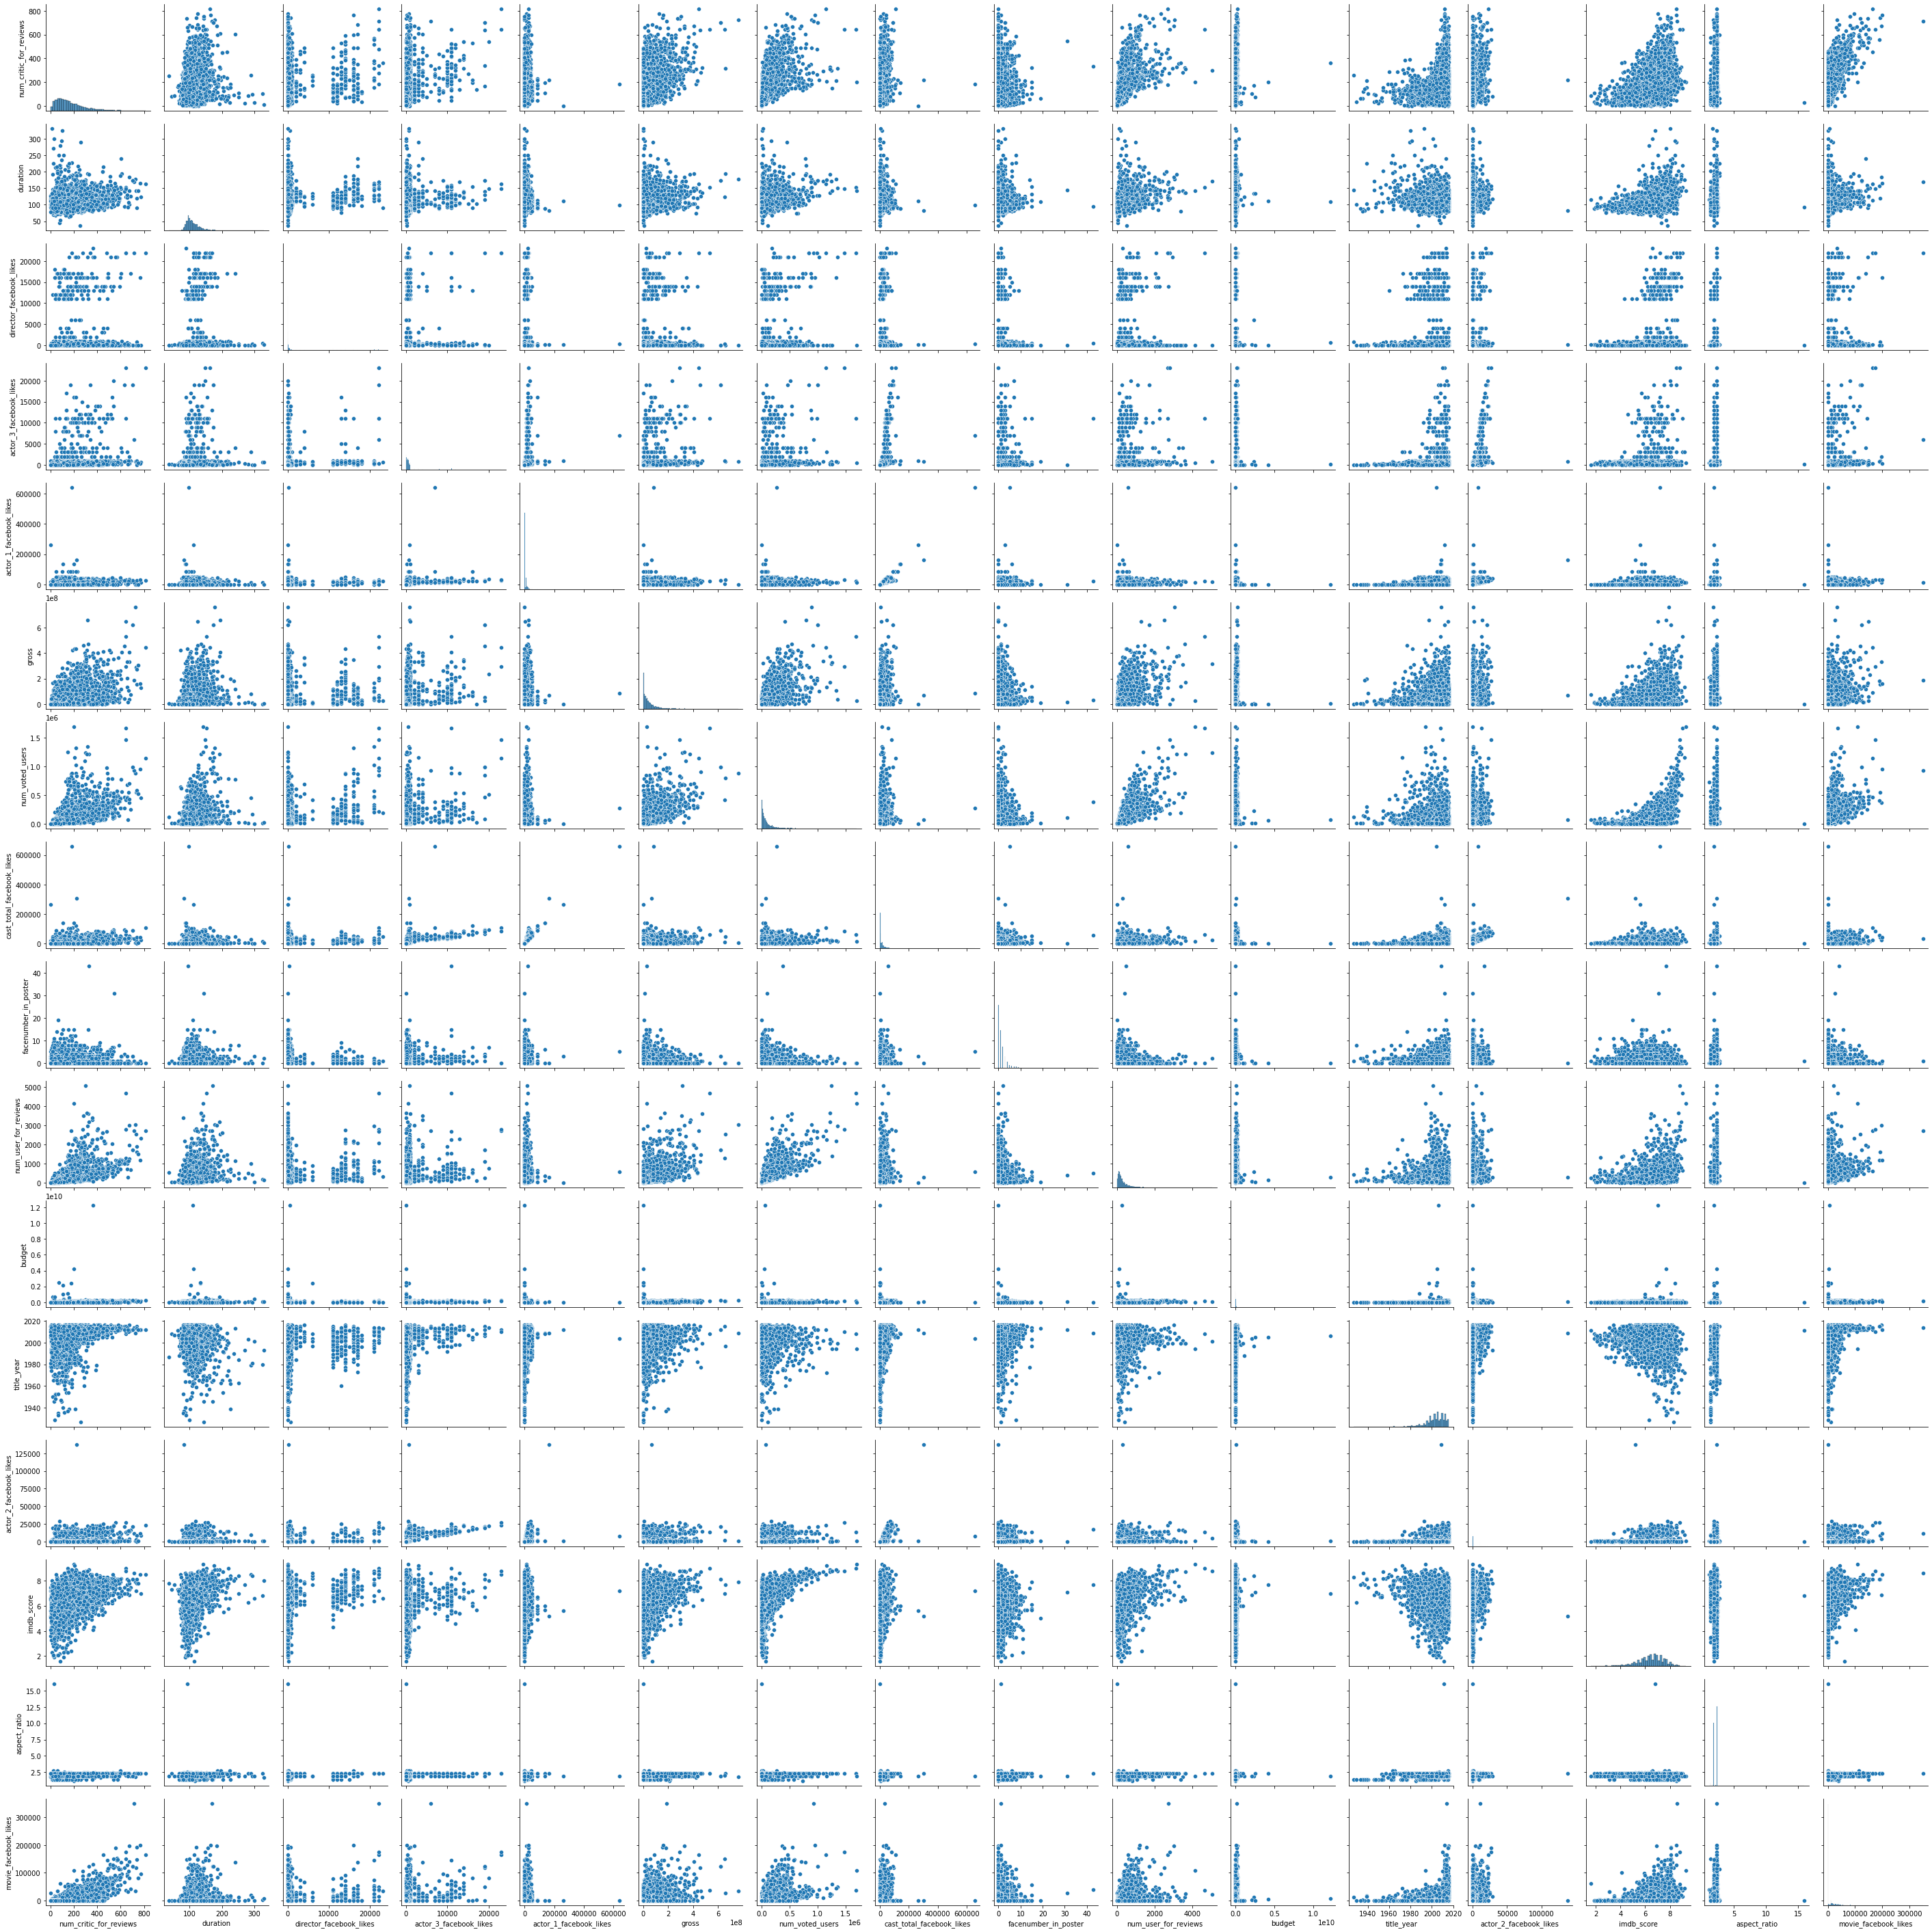

In [12]:
# pair Plot

sns.pairplot(cleaned_data)


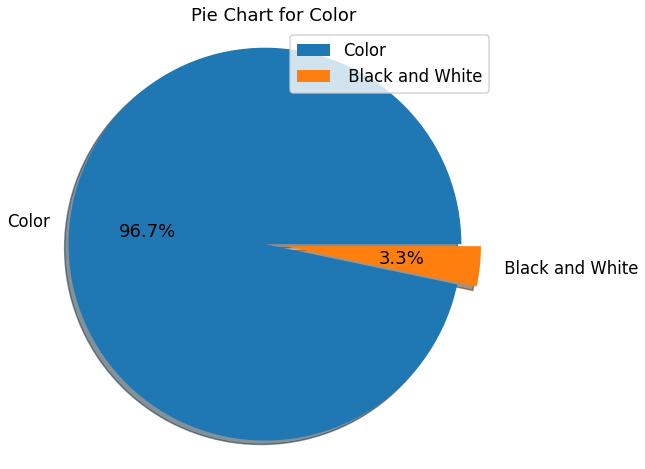

In [13]:
# Exploring Categories

plt.figure(figsize=(8,8))
sns.set_context('talk')
plt.pie(cleaned_data['color'].value_counts(),labels=cleaned_data['color'].value_counts().index,
        shadow=True, explode=(0,0.1),autopct='%1.1f%%')
plt.legend()
plt.title('Pie Chart for Color')
plt.axis('equal')
plt.show()


No handles with labels found to put in legend.


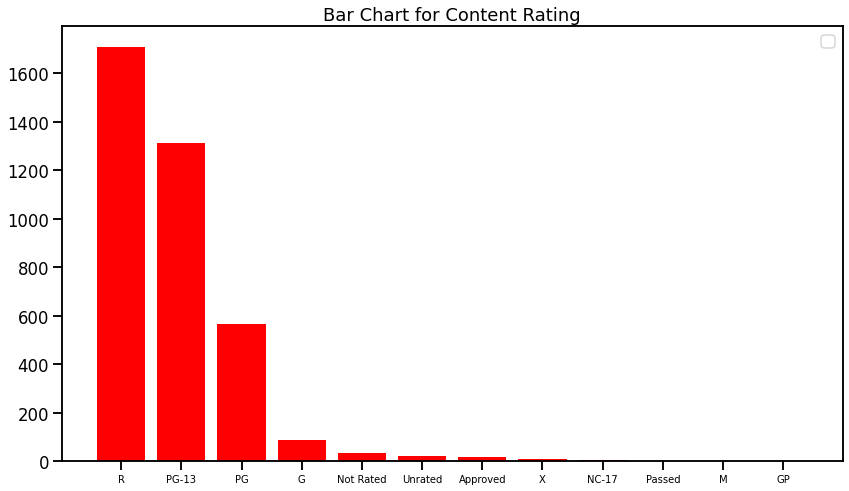

In [14]:
plt.figure(figsize=(14,8))
sns.set_context('talk')
plt.bar(cleaned_data['content_rating'].value_counts().index,cleaned_data['content_rating'].value_counts(),color='r')
plt.legend()
plt.xticks(fontsize=10)
plt.title('Bar Chart for Content Rating')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


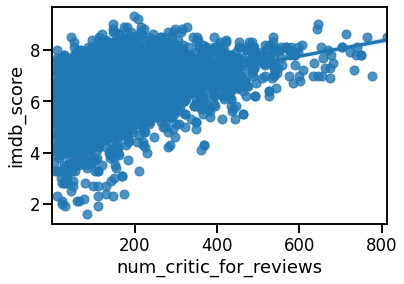

In [15]:
sns.regplot(cleaned_data['num_critic_for_reviews'],cleaned_data['imdb_score'],)

In [17]:
# Performing Basic Statistics
basic_statistics = data.describe()
basic_statistics


num_critic_for_reviews     duration  ...  aspect_ratio  movie_facebook_likes
count             4993.000000  5028.000000  ...   4714.000000           5043.000000
mean               140.194272   107.201074  ...      2.220403           7525.964505
std                121.601675    25.197441  ...      1.385113          19320.445110
min                  1.000000     7.000000  ...      1.180000              0.000000
25%                 50.000000    93.000000  ...      1.850000              0.000000
50%                110.000000   103.000000  ...      2.350000            166.000000
75%                195.000000   118.000000  ...      2.350000           3000.000000
max                813.000000   511.000000  ...     16.000000         349000.000000

[8 rows x 16 columns]

In [18]:
bs= basic_statistics.T
count =bs['count']



In [19]:
# Segreagting the features with missing values belonging to Numerical Class
# To see the features Missing Values
features_missing_values = []
 
for i in range(0,len(count)):
  if count[i] < 5043:
    features_missing_values.append(bs.index[i])
  else:
    continue
features_missing_values

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'aspect_ratio']

In [20]:

# Exploring Data to group by color  with resepect to means
color_group=cleaned_data.groupby('color').mean()
color_group



num_critic_for_reviews  ...  movie_facebook_likes
color                                     ...                      
 Black and White              167.153226  ...           6487.129032
Color                         166.835985  ...           9427.464070

[2 rows x 16 columns]

In [21]:
#performing same steps for observing the content Rating
rating_group = data.groupby('content_rating').mean()
rating_group['imdb_score']

content_rating
Approved     7.325455
G            6.529464
GP           6.916667
M            6.840000
NC-17        6.542857
Not Rated    6.631034
PG           6.294437
PG-13        6.257495
Passed       7.166667
R            6.527101
TV-14        7.250000
TV-G         6.920000
TV-MA        8.250000
TV-PG        7.353846
TV-Y         7.400000
TV-Y7        7.200000
Unrated      6.920968
X            6.500000
Name: imdb_score, dtype: float64

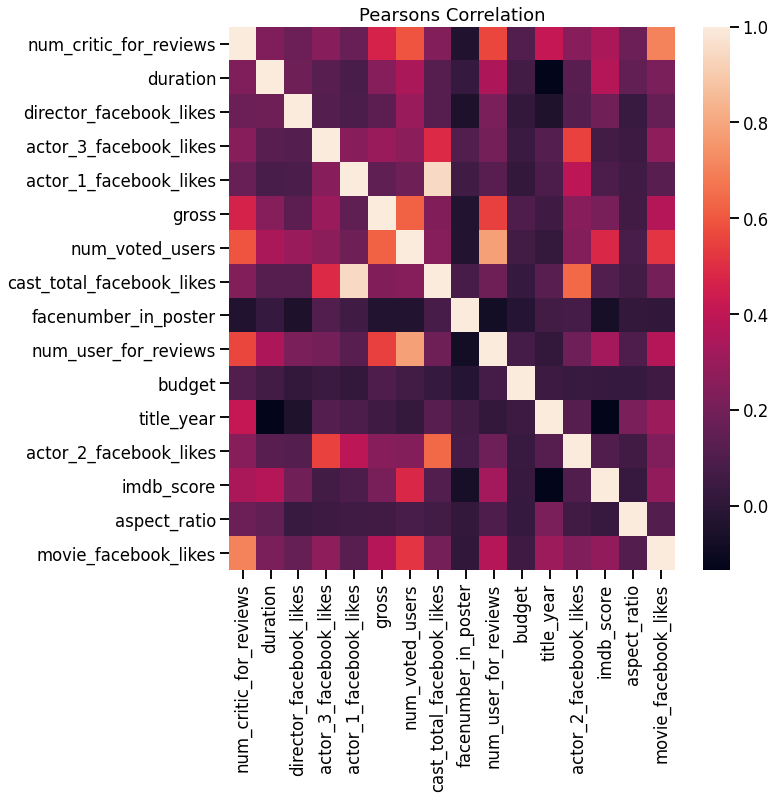

In [22]:
# Calculating Correlation 
# Gettign Pearson Correlation Coefficient
# To check for multicollinearity
corr = cleaned_data.corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr)
plt.title('Pearsons Correlation')
plt.show()

# Feature Engineering

In [23]:
# Looking for distributions 
# We are Supposing aur Continuous Variables are Normally Distrubuted
# First of all creating a record for float or integer features 
int_feat = cleaned_data.dtypes == np.int
int_features = cleaned_data.columns[int_feat]
mask = cleaned_data.dtypes == np.float 
continuous_features = cleaned_data.columns[mask]
skew_limit = 0.75
float_skew_vals = cleaned_data[continuous_features].skew()
int_skew_vals = cleaned_data[int_features].skew()

In [24]:
int_skew_cols = (int_skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

int_skew_cols

Skew
cast_total_facebook_likes  12.903986
movie_facebook_likes        4.523277
num_voted_users             3.654109

In [25]:
float_skew_cols = (float_skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

float_skew_cols


Skew
budget                   44.250134
actor_1_facebook_likes   20.357869
aspect_ratio             15.994512
actor_2_facebook_likes    9.023585
actor_3_facebook_likes    6.381297
facenumber_in_poster      4.942065
director_facebook_likes   4.764438
num_user_for_reviews      3.845465
gross                     3.032788
duration                  2.401096
num_critic_for_reviews    1.423264
title_year               -2.068857

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Skewed Distribution')

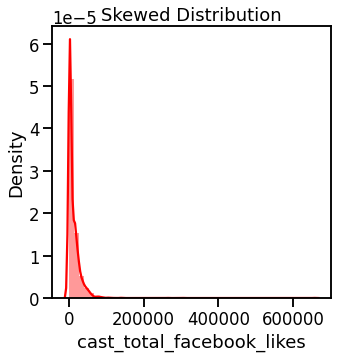

In [26]:
#Visualizaing the Skewed Features
plt.figure(figsize=(5,5))
sns.distplot(cleaned_data[int_skew_cols.index[0]],color='r')
plt.xlabel(int_skew_cols.index[0])
plt.title('Skewed Distribution')



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Skewed Distribution')

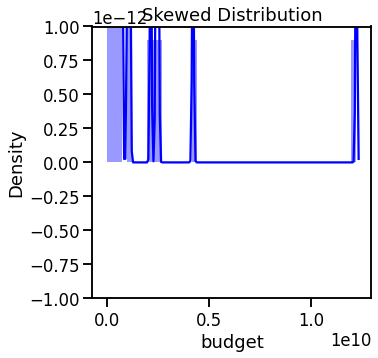

In [27]:
plt.figure(figsize=(5,5))
sns.distplot(data[float_skew_cols.index[0]],color='b')
plt.xlabel(float_skew_cols.index[0])
plt.title('Skewed Distribution')

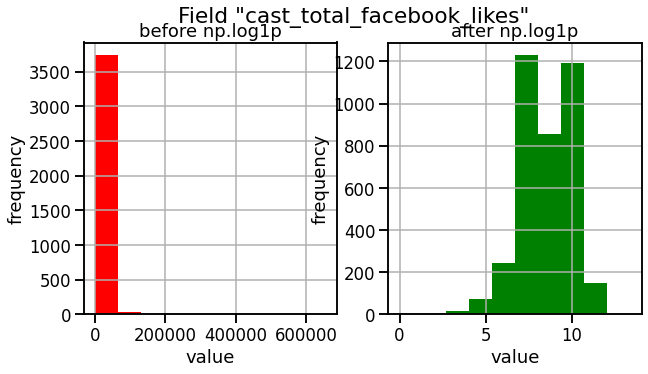

In [28]:
# Applying log  Transformation and observing the result
# Choose a field
field = "cast_total_facebook_likes"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
cleaned_data[field].hist(ax=ax_before,color='r')

# Apply a log transformation (numpy syntax) to this column
cleaned_data[field].apply(np.log1p).hist(ax=ax_after,color='g')

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field)); 

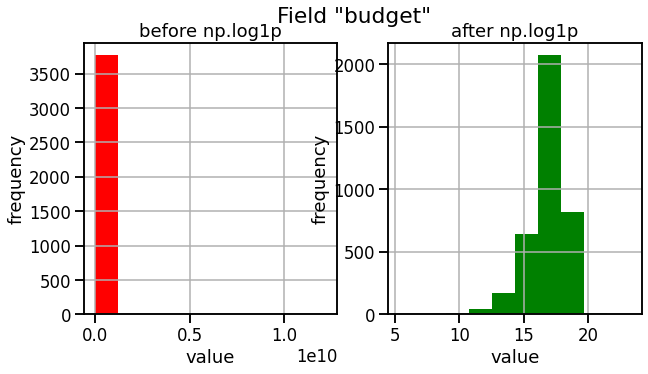

In [29]:
# Applying log  Transformation and observing the result
# Choose a field
field = "budget"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
cleaned_data[field].hist(ax=ax_before,color='r')

# Apply a log transformation (numpy syntax) to this column
cleaned_data[field].apply(np.log1p).hist(ax=ax_after,color='g')

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field)); 

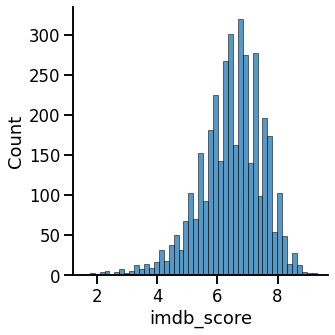

In [30]:
# Setting up the Target
target = cleaned_data['imdb_score']
sns.displot(target)


# Data Labeling for Categorical Data

In [31]:
info=cleaned_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3770 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3770 non-null   object 
 1   num_critic_for_reviews     3770 non-null   float64
 2   duration                   3770 non-null   float64
 3   director_facebook_likes    3770 non-null   float64
 4   actor_3_facebook_likes     3770 non-null   float64
 5   actor_1_facebook_likes     3770 non-null   float64
 6   gross                      3770 non-null   float64
 7   genres                     3770 non-null   object 
 8   num_voted_users            3770 non-null   int64  
 9   cast_total_facebook_likes  3770 non-null   int64  
 10  facenumber_in_poster       3770 non-null   float64
 11  num_user_for_reviews       3770 non-null   float64
 12  language                   3770 non-null   object 
 13  country                    3770 non-null   objec

In [32]:
z=cleaned_data['genres'].value_counts()
z[z>100]


Comedy|Drama|Romance    147
Drama                   145
Comedy|Drama            139
Comedy                  138
Comedy|Romance          131
Drama|Romance           115
Name: genres, dtype: int64

In [33]:
cleaned_data=cleaned_data.reset_index()

In [34]:

cleaned_data.drop('index',inplace=True,axis=1)
cleaned_data.tail()

color  num_critic_for_reviews  ...  aspect_ratio  movie_facebook_likes
3765  Color                    81.0  ...          2.35                   171
3766  Color                    64.0  ...          1.85                   697
3767  Color                   143.0  ...          1.85                 19000
3768  Color                    56.0  ...          1.37                     0
3769  Color                    43.0  ...          1.85                   456

[5 rows x 21 columns]

In [35]:

for i in range(0,len(cleaned_data)):
  s=cleaned_data['genres'][i].split('|')
  cleaned_data['genres'][i]=s[0]
cleaned_data['genres'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Comedy         990
Action         960
Drama          675
Adventure      369
Crime          256
Biography      206
Horror         164
Animation       45
Fantasy         37
Documentary     28
Mystery         23
Sci-Fi           7
Family           3
Western          3
Musical          2
Thriller         1
Romance          1
Name: genres, dtype: int64

In [36]:
cat ={'Comedy':1,'Action':2,'Drama':3,'Adventure':4,'Crime':5,'Biography':6,'Horror':7}
cat.keys()
for i in range(0,len(cleaned_data)):
  if cleaned_data['genres'][i] in cat.keys():
    continue
  else:
    cleaned_data['genres'][i]= 'Others'

cleaned_data['genres'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Comedy       990
Action       960
Drama        675
Adventure    369
Crime        256
Biography    206
Horror       164
Others       150
Name: genres, dtype: int64

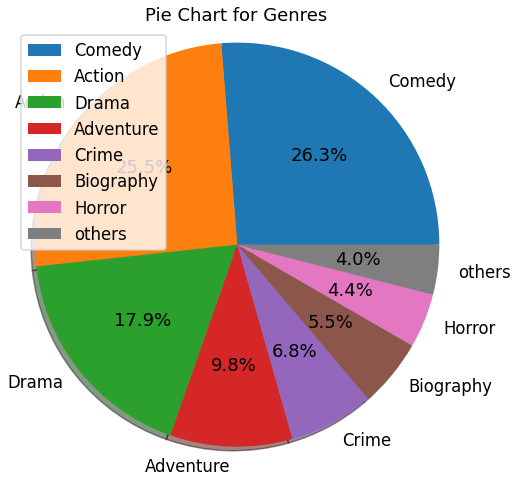

In [37]:
lab=['Comedy','Action','Drama','Adventure','Crime','Biography','Horror','others']
plt.figure(figsize=(8,8))
sns.set_context('talk')
plt.pie(cleaned_data['genres'].value_counts(),labels=lab,
        shadow=True,autopct='%1.1f%%')
plt.legend()
plt.title('Pie Chart for Genres')
plt.axis('equal')
plt.show()

In [38]:
cleaned_data['language'].value_counts()
for i in range(0, len(cleaned_data)):
  if cleaned_data['language'][i] == 'English':
    continue
  else:
    cleaned_data['language'][i] = 'Others'
cleaned_data['language'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


English    3611
Others      159
Name: language, dtype: int64

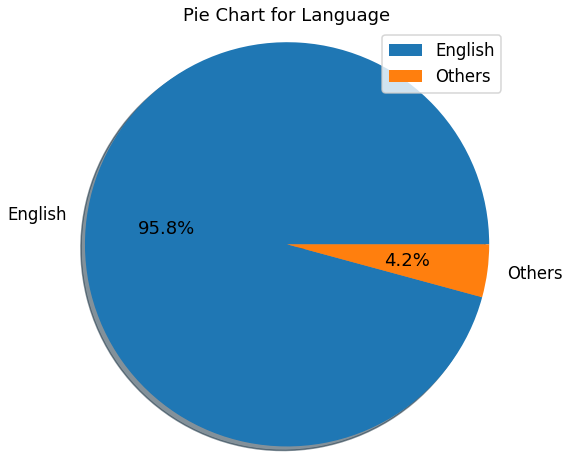

In [39]:
plt.figure(figsize=(8,8))
sns.set_context('talk')
plt.pie(cleaned_data['language'].value_counts(),labels=['English','Others'],
        shadow=True,autopct='%1.1f%%')
plt.legend()
plt.title('Pie Chart for Language')
plt.axis('equal')
plt.show()

In [40]:

for i in range(0, len(cleaned_data)):
  if cleaned_data['country'][i] == 'USA':
    continue
  else:
    cleaned_data['country'][i] = 'Others'

cleaned_data['country'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


USA       2995
Others     775
Name: country, dtype: int64

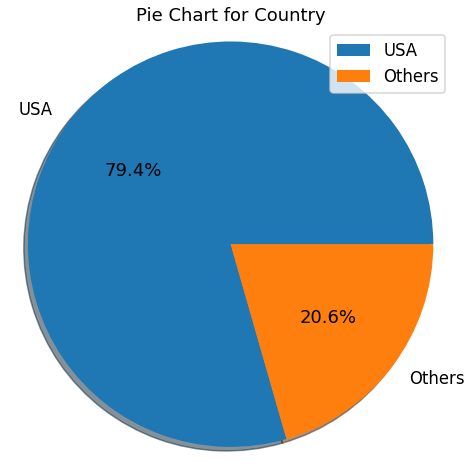

In [41]:
plt.figure(figsize=(8,8))
sns.set_context('talk')
plt.pie(cleaned_data['country'].value_counts(),labels=['USA','Others'],
        shadow=True,autopct='%1.1f%%')
plt.legend()
plt.title('Pie Chart for Country')
plt.axis('equal')
plt.show()

In [42]:
cleaned_data['content_rating'].value_counts()
cat ={'R':1,'PG-13':2,'PG':3}
cat.keys()
for i in range(0,len(cleaned_data)):
  if cleaned_data['content_rating'][i] in cat.keys():
    continue
  else:
    cleaned_data['content_rating'][i]= 'Others'

cleaned_data['content_rating'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


R         1708
PG-13     1312
PG         567
Others     183
Name: content_rating, dtype: int64

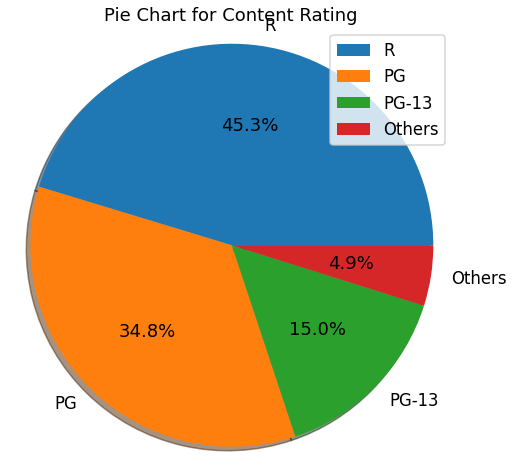

In [43]:
lab=['R','PG','PG-13','Others']
plt.figure(figsize=(8,8))
sns.set_context('talk')
plt.pie(cleaned_data['content_rating'].value_counts(),labels=lab,
        shadow=True,autopct='%1.1f%%')
plt.legend()
plt.title('Pie Chart for Content Rating')
plt.axis('equal')
plt.show()

In [44]:
encoded_data = pd.get_dummies(cleaned_data)
encoded_data.head()

num_critic_for_reviews  duration  ...  content_rating_PG-13  content_rating_R
0                   723.0     178.0  ...                     1                 0
1                   302.0     169.0  ...                     1                 0
2                   602.0     148.0  ...                     1                 0
3                   813.0     164.0  ...                     1                 0
4                   462.0     132.0  ...                     1                 0

[5 rows x 34 columns]

In [45]:
encoded_data.describe()

num_critic_for_reviews  ...  content_rating_R
count             3770.000000  ...       3770.000000
mean               166.846419  ...          0.453050
std                123.537036  ...          0.497857
min                  1.000000  ...          0.000000
25%                 77.000000  ...          0.000000
50%                138.000000  ...          0.000000
75%                224.000000  ...          1.000000
max                813.000000  ...          1.000000

[8 rows x 34 columns]

In [46]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3770 entries, 0 to 3769
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     3770 non-null   float64
 1   duration                   3770 non-null   float64
 2   director_facebook_likes    3770 non-null   float64
 3   actor_3_facebook_likes     3770 non-null   float64
 4   actor_1_facebook_likes     3770 non-null   float64
 5   gross                      3770 non-null   float64
 6   num_voted_users            3770 non-null   int64  
 7   cast_total_facebook_likes  3770 non-null   int64  
 8   facenumber_in_poster       3770 non-null   float64
 9   num_user_for_reviews       3770 non-null   float64
 10  budget                     3770 non-null   float64
 11  title_year                 3770 non-null   float64
 12  actor_2_facebook_likes     3770 non-null   float64
 13  imdb_score                 3770 non-null   float

In [47]:
# We previously saw our skewed features Now we will perform 
# Transformations on them to make them as close to Gaussian or Normal
# Distribution as Possible
# Performing the log1p Transformation on our skewed columns


for col in int_skew_cols.index.values:
  if col == 'imdb_score':
    continue
  else:
    encoded_data[col] = encoded_data[col].apply(np.log1p)

for col in float_skew_cols.index.values:
  if col == 'imdb_score':
    continue
  else:
    encoded_data[col] = encoded_data[col].apply(np.log1p)


In [49]:
# Again Observing Pearson's Correlation with full features

corr = enc_data.corr()



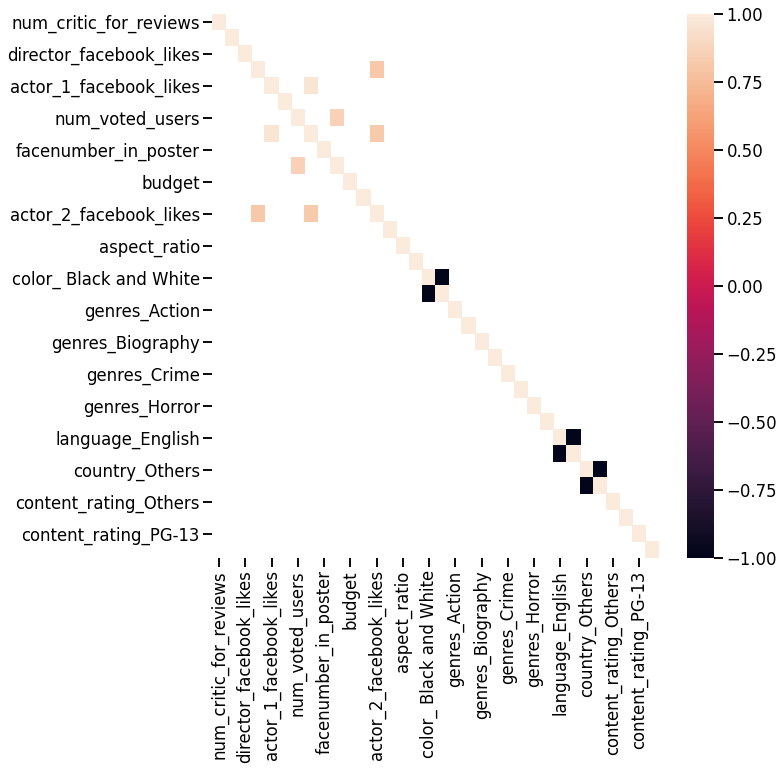

In [51]:
# the figure shows highly correlated values
cor_limit =0.8
c=corr[np.abs(corr)>cor_limit]
plt.figure(figsize =(10,10))
sns.heatmap(c)
# We can observe multicolinearity

In [52]:
# Observing the highly correlated values
for x in range(corr.shape[0]):
    corr.iloc[x,x] = 0.0
corr.abs().idxmax()

num_critic_for_reviews                 num_voted_users
duration                                    imdb_score
director_facebook_likes                num_voted_users
actor_3_facebook_likes          actor_2_facebook_likes
actor_1_facebook_likes       cast_total_facebook_likes
gross                                  num_voted_users
num_voted_users                   num_user_for_reviews
cast_total_facebook_likes       actor_1_facebook_likes
facenumber_in_poster                     genres_Comedy
num_user_for_reviews                   num_voted_users
budget                                           gross
title_year                      num_critic_for_reviews
actor_2_facebook_likes       cast_total_facebook_likes
imdb_score                             num_voted_users
aspect_ratio                                    budget
movie_facebook_likes            num_critic_for_reviews
color_ Black and White                     color_Color
color_Color                     color_ Black and White
genres_Act

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


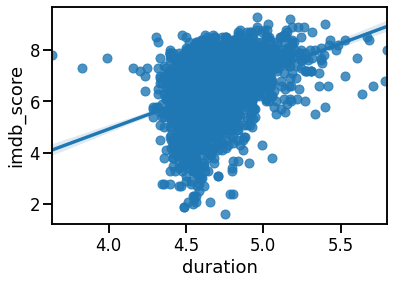

In [53]:
sns.regplot(enc_data['duration'],enc_data['imdb_score'])

In [54]:
# Scaling the Data 
from sklearn.preprocessing import MinMaxScaler

scaled_data = enc_data.copy()
mms = MinMaxScaler()

for col in scaled_data.columns:
  if col == 'imdb_score':
    continue
  else:
    scaled_data[col] = mms.fit_transform(scaled_data[[col]]).squeeze()


In [55]:
scaled_data.head(5)

num_critic_for_reviews  duration  ...  content_rating_PG-13  content_rating_R
0                0.980500  0.715997  ...                   1.0               0.0
1                0.835537  0.692164  ...                   1.0               0.0
2                0.950066  0.631250  ...                   1.0               0.0
3                1.000000  0.678373  ...                   1.0               0.0
4                0.906099  0.578768  ...                   1.0               0.0

[5 rows x 34 columns]

# Machine Learning

## Using Kmeans Clustering to label Data and give an additional feature

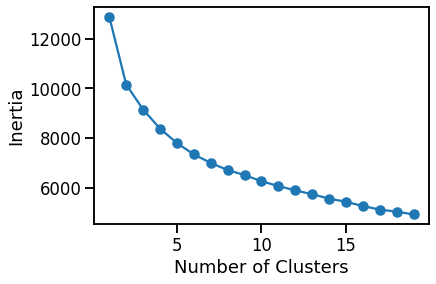

In [56]:
from sklearn.cluster import KMeans
inertia = []
list_num_clusters = list(range(1,20))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(scaled_data)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

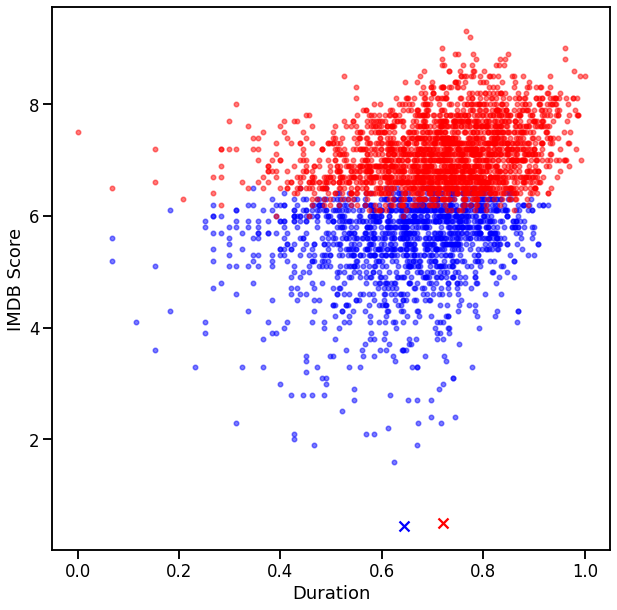

In [57]:
# Performing Clustering
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    plt.figure(figsize=(10,10))
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
          plt.scatter(X[km.labels_==i]['num_critic_for_reviews'],X[km.labels_==i]['imdb_score'],c = color[i],alpha = alpha,s=s)
          plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)
          plt.xlabel('Duration')
          plt.ylabel('IMDB Score')

num_clusters = 2
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(scaled_data)
display_cluster(scaled_data,km,num_clusters)

In [58]:
enc_data['Cluster']=km.labels_
scaled_data['Cluster']=km.labels_

In [59]:
from sklearn.decomposition import PCA
pca_list = list()
feature_weight_list =list()
x_data =  scaled_data.drop('imdb_score',axis=1,inplace = False)
y_data = scaled_data['imdb_score']
# Fitting Multiple PCA Models
for n in range(1,33):
  PCAModel=PCA(n_components =n)
  PCAModel.fit(x_data)
  pca_list.append(pd.Series({'n':n,'Model':PCAModel,
                             'Variance Explained':PCAModel.explained_variance_ratio_.sum()}))
  abs_feature_values = np.abs(PCAModel.components_).sum(axis=0)
  feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': x_data.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df.head(10)

Model Variance Explained
n                                                                       
1   PCA(copy=True, iterated_power='auto', n_compon...           0.181829
2   PCA(copy=True, iterated_power='auto', n_compon...           0.318106
3   PCA(copy=True, iterated_power='auto', n_compon...           0.423337
4   PCA(copy=True, iterated_power='auto', n_compon...            0.51699
5   PCA(copy=True, iterated_power='auto', n_compon...           0.602955
6   PCA(copy=True, iterated_power='auto', n_compon...           0.670006
7   PCA(copy=True, iterated_power='auto', n_compon...           0.718069
8   PCA(copy=True, iterated_power='auto', n_compon...           0.759707
9   PCA(copy=True, iterated_power='auto', n_compon...           0.792158
10  PCA(copy=True, iterated_power='auto', n_compon...           0.819703

In [60]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))



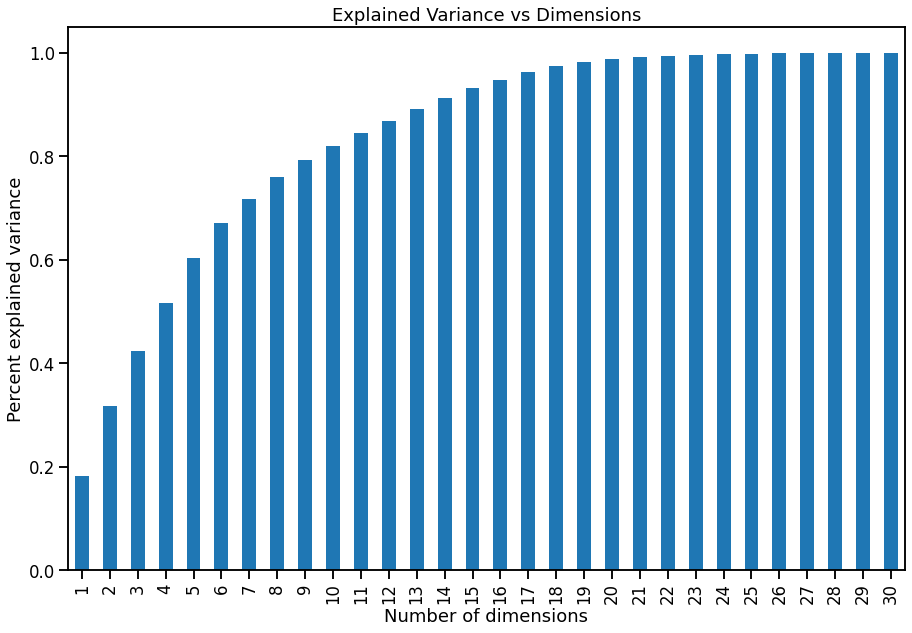

In [61]:
plt.figure(figsize=(15,10))
sns.set_context('talk')
ax = pca_df['Variance Explained'][0:30].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

Varaince Explained by  15 is 0.93


Text(0, 0.5, 'Proportion of variance explained')

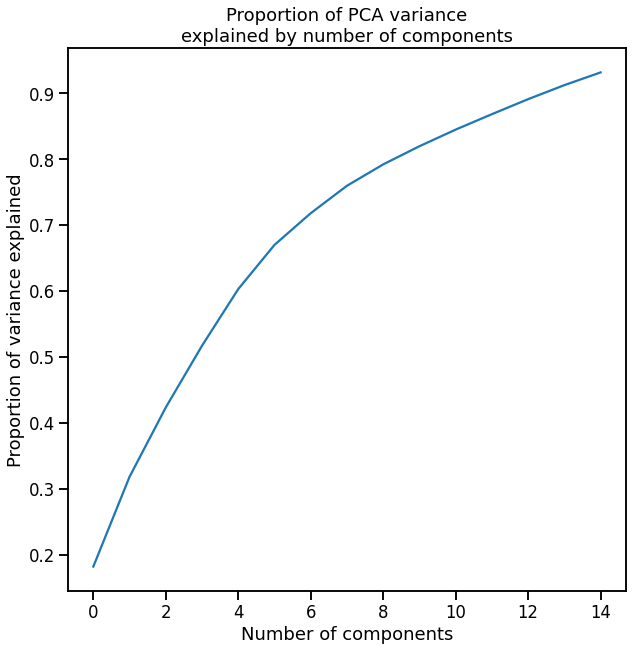

In [62]:
# Again for PCA observing the optimal number of dimensions

def pca(n_components,data):
  pca = PCA(n_components=n_components)
  pca_fit = pca.fit(data)
  print('Varaince Explained by ',n_components,'is',round(sum(pca_fit.explained_variance_ratio_),2))
  return pca_fit, pca.transform(data)
pca_full,x_transformed = pca(15,x_data)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.title("Proportion of PCA variance\nexplained by number of components")
plt.xlabel("Number of components")
plt.ylabel("Proportion of variance explained")

In [63]:
# Figure Tells we just need 15 components to fully explain >90 % varaince in our data 

Varaince Explained by  33 is 1.0


Text(0, 0.5, 'Proportion of variance explained')

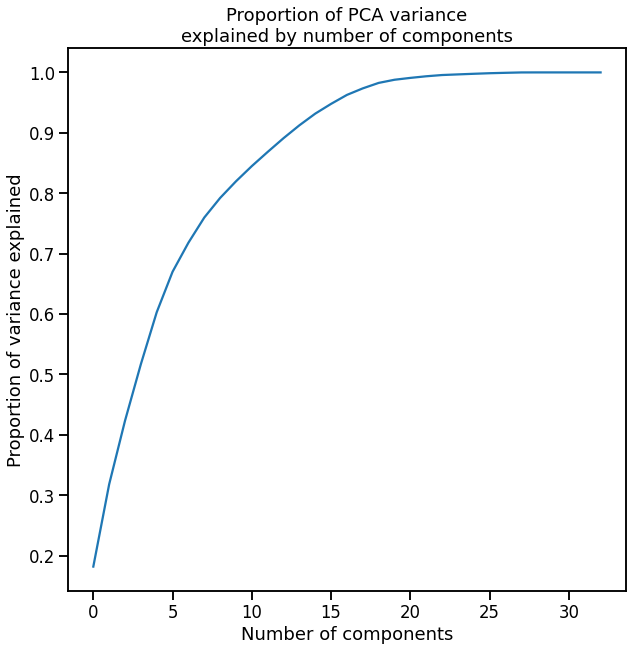

In [64]:
pca_full, x_data_transformed = pca(33,x_data)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.title("Proportion of PCA variance\nexplained by number of components")
plt.xlabel("Number of components")
plt.ylabel("Proportion of variance explained")


In [65]:
features_imp=features_df.T

features_imp[:]


n                                1         2   ...        31        32
features                                       ...                    
Cluster                    0.125065  0.088201  ...  0.031708  0.031015
actor_1_facebook_likes     0.007337  0.005895  ...  0.033190  0.032464
actor_2_facebook_likes     0.010993  0.008803  ...  0.032376  0.031668
actor_3_facebook_likes     0.015457  0.012609  ...  0.035010  0.034244
aspect_ratio               0.000206  0.002098  ...  0.017853  0.017462
budget                     0.011498  0.009183  ...  0.032571  0.031859
cast_total_facebook_likes  0.009000  0.007484  ...  0.028760  0.028131
color_ Black and White     0.007462  0.005630  ...  0.022278  0.028320
color_Color                0.007462  0.005630  ...  0.022278  0.028320
content_rating_Others      0.004116  0.007573  ...  0.033787  0.033499
content_rating_PG          0.019450  0.011233  ...  0.030003  0.029799
content_rating_PG-13       0.161201  0.135627  ...  0.031968  0.031721
content_rating_R           0.176536  0.150354  ...  0.032666  0.032404
country_Others             0.092677  0.125536  ...  0.019240  0.019970
country_USA                0.092677  0.125536  ...  0.019240  0.019970
director_facebook_likes    0.002271  0.003436  ...  0.026534  0.025953
duration                   0.004480  0.005861  ...  0.026013  0.025444
facenumber_in_poster       0.007971  0.006590  ...  0.023450  0.022937
genres_Action              0.034473  0.046020  ...  0.032423  0.031866
genres_Adventure           0.004968  0.007401  ...  0.031828  0.031283
genres_Biography           0.010016  0.010378  ...  0.033123  0.032550
genres_Comedy              0.039826  0.059530  ...  0.031039  0.030512
genres_Crime               0.026088  0.020678  ...  0.031666  0.031125
genres_Drama               0.034355  0.031445  ...  0.031120  0.030591
genres_Horror              0.006089  0.009291  ...  0.031167  0.030637
genres_Others              0.002720  0.001454  ...  0.028992  0.028510
gross                      0.020238  0.010702  ...  0.036832  0.036027
language_English           0.027362  0.031407  ...  0.024865  0.026066
language_Others            0.027362  0.031407  ...  0.024865  0.026066
movie_facebook_likes       0.000685  0.003875  ...  0.025406  0.024850
num_critic_for_reviews     0.003730  0.007234  ...  0.038037  0.037205
num_user_for_reviews       0.000947  0.004260  ...  0.037966  0.037135
num_voted_users            0.000147  0.003442  ...  0.033528  0.032795
title_year                 0.005135  0.004197  ...  0.028218  0.027600

[34 rows x 32 columns]

Varaince Explained by  15 is 0.93


Text(0, 0.5, 'Proportion of variance explained')

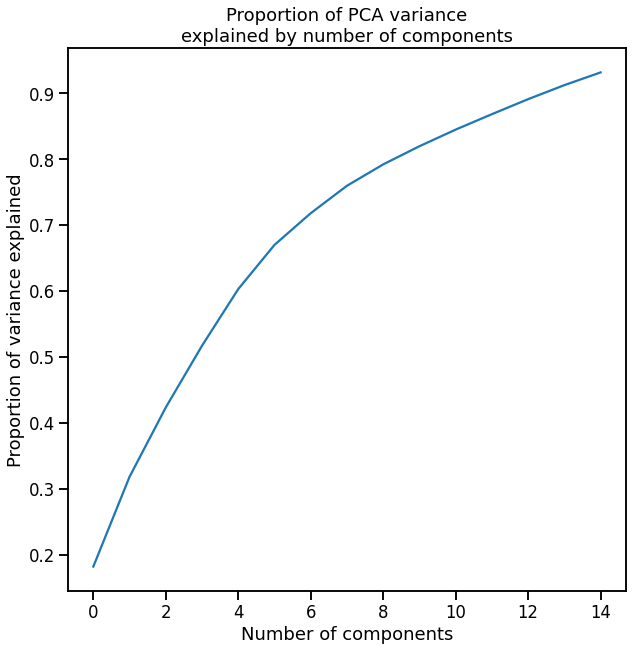

In [66]:
pca_full, x_data_transformed = pca(15,x_data)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.title("Proportion of PCA variance\nexplained by number of components")
plt.xlabel("Number of components")
plt.ylabel("Proportion of variance explained")

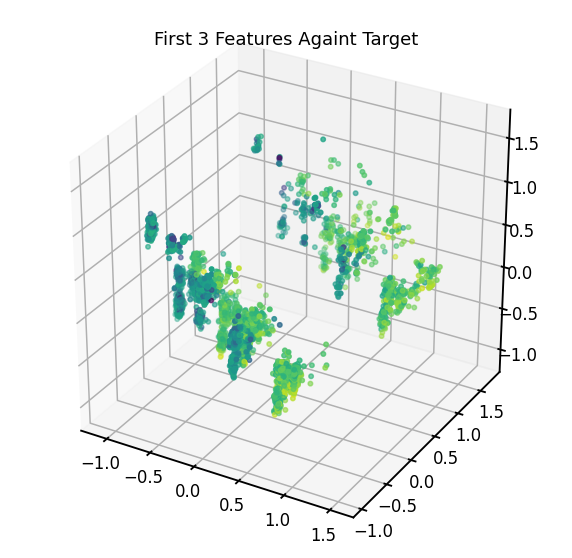

In [67]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x_data_transformed[:,0],x_data_transformed[:,1],x_data_transformed[:,2],c=y_data)
plt.title('First 3 Features Againt Target')

plt.show()

In [68]:
x_data_transformed.shape

(3770, 15)

## Using Linear Regression with Ridge Penalty

In [97]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error
x_tr,x_tst,y_tr,y_tst= train_test_split(x_data,y_data,test_size=0.33,random_state=32)
lr = Ridge(alpha= 0.7)
lr.fit(x_tr,y_tr)


Ridge(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [98]:
lr.coef_

array([ 1.13901794e-01,  1.67465034e+00,  1.63932950e-02, -2.53987529e-01,
        8.39261267e-01, -2.82373374e-01,  3.23273300e+00, -9.48775148e-01,
       -1.20808247e-01, -9.28380665e-01, -1.56758309e+00, -7.40707172e-01,
        1.22511765e-01,  6.02646762e-02,  1.37998844e-01,  8.43467126e-02,
       -8.43467126e-02, -1.51606056e-01,  2.40394552e-02,  1.71588498e-01,
       -1.06275215e-02,  8.27370634e-02,  5.97219534e-02, -2.55086408e-01,
        7.92330152e-02, -2.11337494e-01,  2.11337494e-01, -1.98042069e-02,
        1.98042069e-02,  2.71109135e-02,  5.48638044e-03,  1.52272595e-03,
       -3.41200199e-02,  1.21331875e+00])

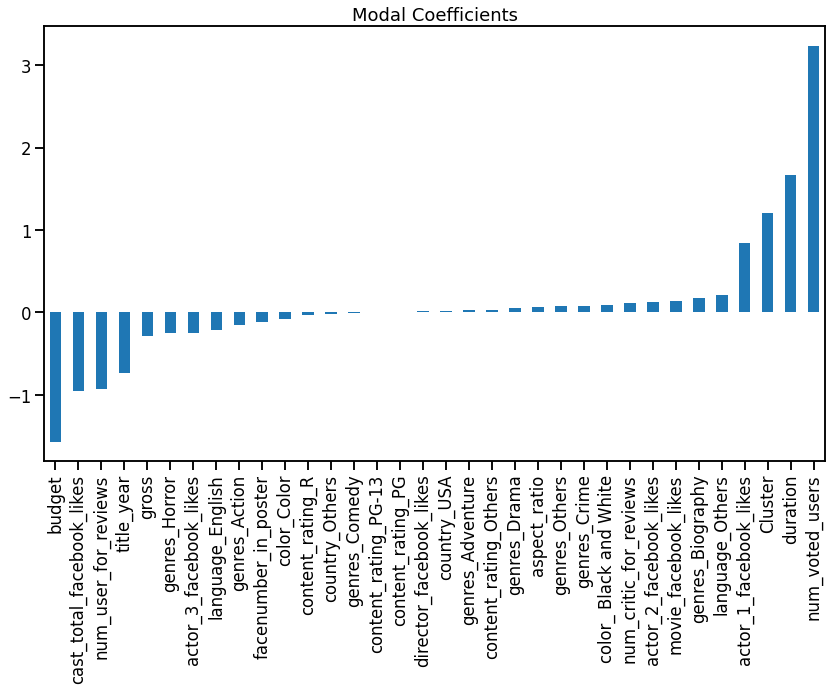

In [99]:
plt.figure(figsize=(14,8))
predictors = x_data.columns
coef = pd.Series(lr.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [101]:
print('R2 Score : ',r2_score(y_tst,lr.predict(x_tst)))
print('Mean Squared Error : ', mean_squared_error(y_tst,lr.predict(x_tst)))

R2 Score :  0.7000740843432431
Mean Squared Error :  0.3497580349999756


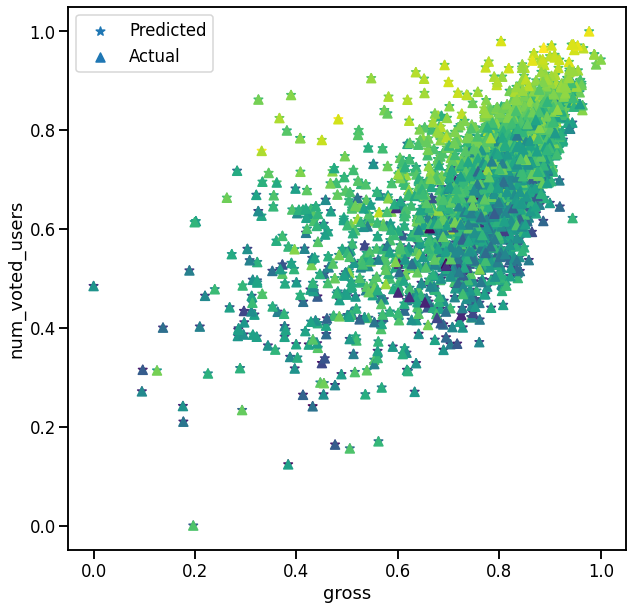

In [104]:
plt.figure(figsize=(10,10))
plt.scatter(x_tr['gross'],x_tr['num_voted_users'],c=lr.predict(x_tr),marker='*',label='Predicted')
plt.scatter(x_tr['gross'],x_tr['num_voted_users'],c=y_tr,marker='^',label='Actual')
plt.xlabel(enc_data.columns[5])
plt.ylabel(enc_data.columns[6])
plt.legend()


Text(0, 0.5, 'Predicted')

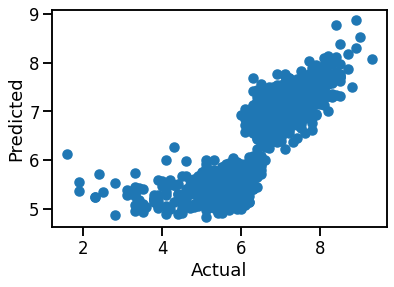

In [105]:
plt.scatter(y_tst,lr.predict(x_tst))
plt.xlabel('Actual')
plt.ylabel('Predicted')

## K Near Neighbors Regressor

In [106]:
# Using Machine & Deep Learning
# Building Training & Testing Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data_transformed,y_data,random_state=32,test_size=0.33)
from sklearn.neighbors import KNeighborsRegressor
y_train=y_train.astype(float)
y_test=y_test.astype(float)

In [107]:
# Using Elbow Method 
score_test =[]
score_train =[]
neighbr =[]
from sklearn.metrics import mean_squared_error
for i in range(2,60):
  KNN = KNeighborsRegressor(n_neighbors=i)
  KNN.fit(x_train,y_train)
  mse_test = mean_squared_error(y_test,KNN.predict(x_test))
  mse_train = mean_squared_error(y_train,KNN.predict(x_train))
  neighbr.append(i)
  score_test.append(mse_test)
  score_train.append(mse_train)

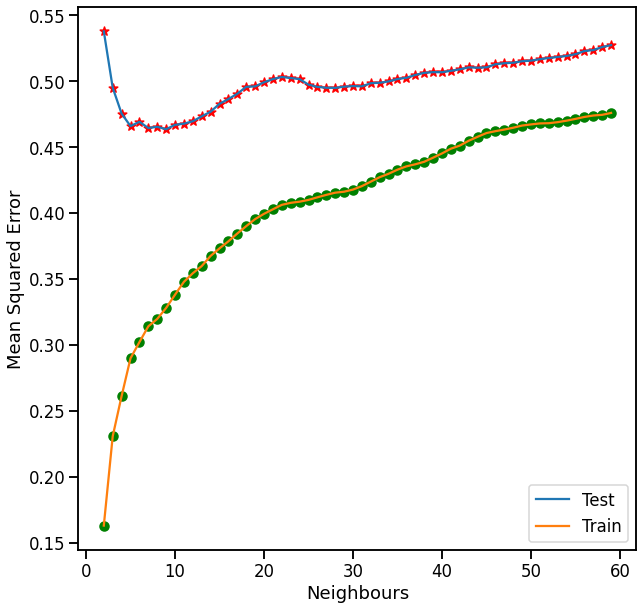

In [108]:
plt.figure(figsize=(10,10))
plt.scatter(neighbr,score_test,c='r',marker='*')
plt.scatter(neighbr,score_train,c='g',marker='o')
plt.plot(neighbr,score_test,label='Test')
plt.plot(neighbr,score_train,label='Train')
plt.xlabel('Neighbours')
plt.ylabel('Mean Squared Error')
plt.legend()

In [109]:
optimal_neighbours = 25
KNN = KNeighborsRegressor(n_neighbors=optimal_neighbours)
KNN.fit(x_train,y_train)
mse_test = mean_squared_error(y_test,KNN.predict(x_test))
mse_tr=mean_squared_error(y_train,KNN.predict(x_train))



In [110]:
mse_tr

0.40989173861386136

In [111]:
mse_test

0.49730982811244984

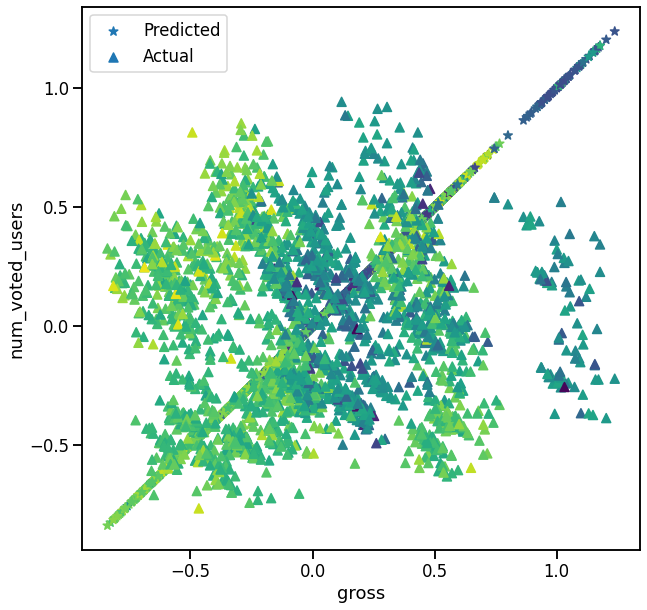

In [112]:
plt.figure(figsize=(10,10))
plt.scatter(x_train[:,5],x_train[:,5],c=KNN.predict(x_train),marker='*',label='Predicted')
plt.scatter(x_train[:,5],x_train[:,6],c=y_train,marker='^',label='Actual')
plt.xlabel(enc_data.columns[5])
plt.ylabel(enc_data.columns[6])
plt.legend()


Text(0, 0.5, 'Predicted')

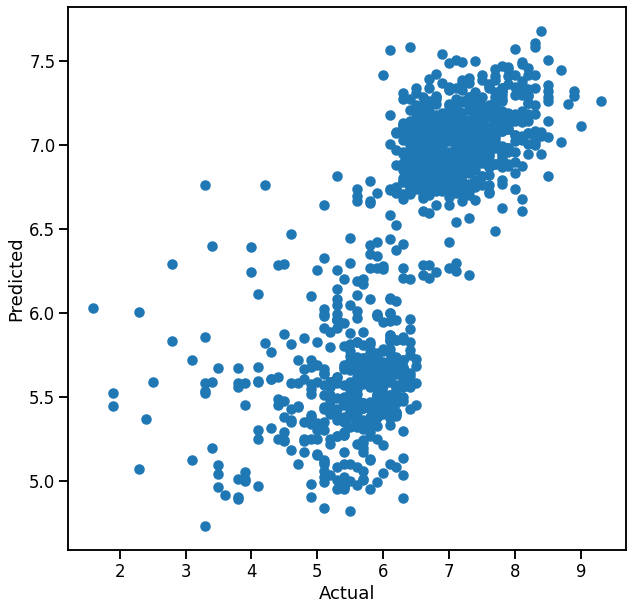

In [113]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,KNN.predict(x_test))
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [115]:
print('R2 Score :',r2_score(y_test,KNN.predict(x_test)))

R2 Score : 0.5735448777846053


# Looking at a decision Neural Network

In [116]:
# Using Deep Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model = Sequential()


In [117]:
model.add(Dense(33)) # input layer
model.add(Dense(200,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(20,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1))


In [118]:
model.compile(optimizer='adam',loss='mse',metrics='mae')
history=model.fit(x_train,y_train,epochs=200,validation_data=(x_test,y_test))

Epoch 1/200
79/79 [==============================] - 4s 7ms/step - loss: 33.6471 - mae: 5.5108 - val_loss: 6.5764 - val_mae: 2.4349
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 11.9237 - mae: 2.8780 - val_loss: 3.1771 - val_mae: 1.6533
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 10.3369 - mae: 2.6615 - val_loss: 4.4769 - val_mae: 2.0095
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 10.2648 - mae: 2.6605 - val_loss: 3.2917 - val_mae: 1.6903
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 9.5825 - mae: 2.5427 - val_loss: 3.5608 - val_mae: 1.7826
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 9.1407 - mae: 2.5017 - val_loss: 1.7021 - val_mae: 1.1730
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 8.2887 - mae: 2.3328 - val_loss: 2.2885 - val_mae: 1.4052
Epoch 8/200
79/79 [==============================] - 0s 5ms/step - loss: 8.3886

In [119]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 33)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6800      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                2020      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2

Text(0.5, 0, 'Epochs')

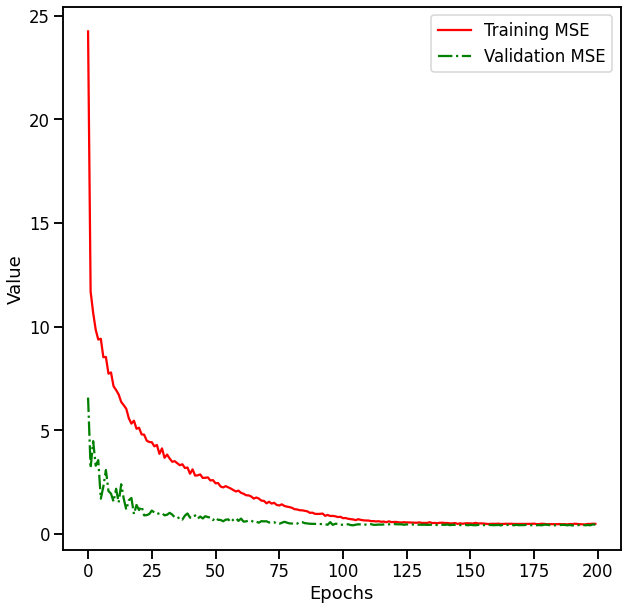

In [120]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'],'r-',label='Training MSE')
plt.plot(history.history['val_loss'],'g-.',label='Validation MSE')
plt.legend()
plt.ylabel('Value')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

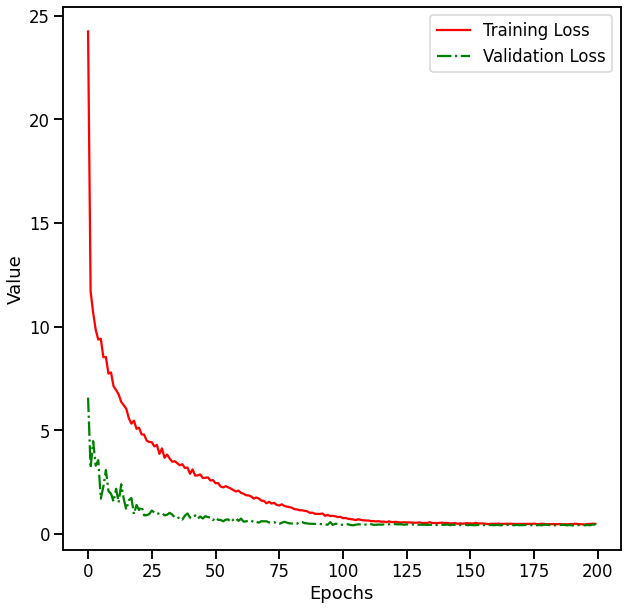

In [121]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'],'r-',label='Training Loss')
plt.plot(history.history['val_loss'],'g-.',label='Validation Loss')
plt.legend()
plt.ylabel('Value')
plt.xlabel('Epochs')

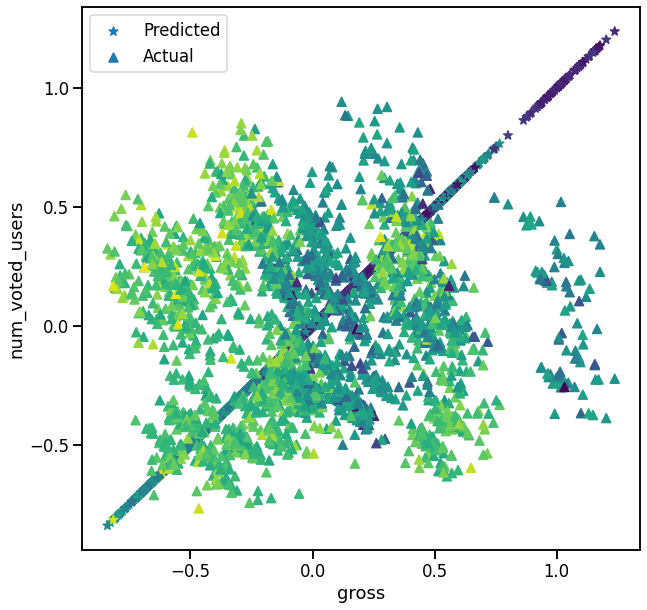

In [122]:
plt.figure(figsize=(10,10))
plt.scatter(x_train[:,5],x_train[:,5],c=model.predict(x_train),marker='*',label='Predicted')
plt.scatter(x_train[:,5],x_train[:,6],c=y_train,marker='^',label='Actual')
plt.xlabel(enc_data.columns[5])
plt.ylabel(enc_data.columns[6])
plt.legend()

Text(0, 0.5, 'Predicted')

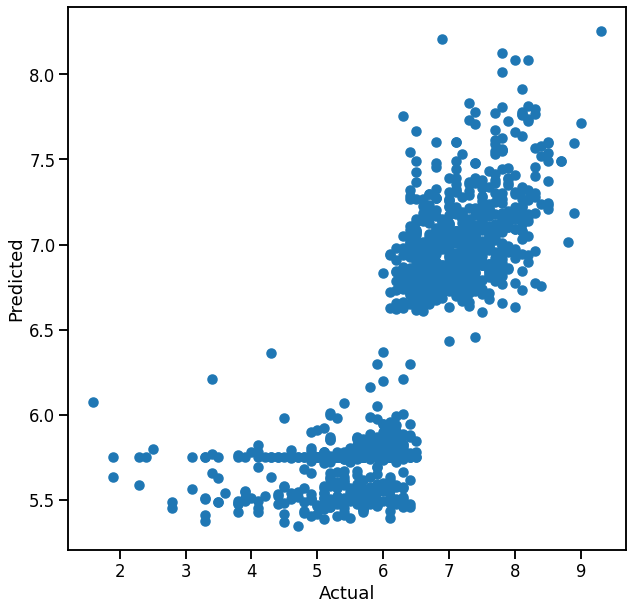

In [123]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,model.predict(x_test))
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [124]:
from sklearn.metrics import r2_score
print('R2 Score : ', r2_score(y_test,model.predict(x_test)))

R2 Score :  0.6155371413658237


# Looking at a decision Tree Regressor

In [125]:
from sklearn.tree import DecisionTreeRegressor
dTree = DecisionTreeRegressor(criterion="mse", max_depth = 4)
dTree

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [126]:
x_data= enc_data.drop('imdb_score',axis=1)
y_data = target.astype(float)
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,random_state =32)

In [127]:
dTree.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [128]:
from sklearn import metrics
import matplotlib.pyplot as plt
predTree = dTree.predict(x_test)
print("DecisionTrees's R2 Score: ", metrics.r2_score(y_test, predTree))
print("DecisionTrees's MSE Score: ", metrics.mean_squared_error(y_test, predTree))

DecisionTrees's R2 Score:  0.6761458665830103
DecisionTrees's MSE Score:  0.3785671337907821


In [129]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [130]:

dotfile = StringIO()
tree.export_graphviz(dTree,feature_names = x_data.columns, out_file=dotfile)
graph=pydotplus.graph_from_dot_data(dotfile.getvalue())
graph.write_png("dtreefinal.png")


True

Text(0, 0.5, 'Predicted')

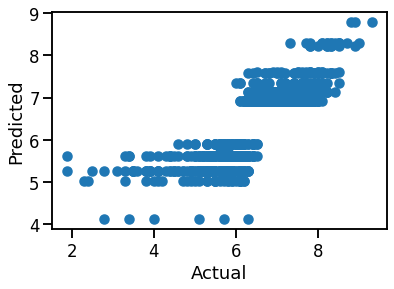

In [131]:
plt.scatter(y_test,dTree.predict(x_test))
plt.xlabel('Actual')
plt.ylabel('Predicted')

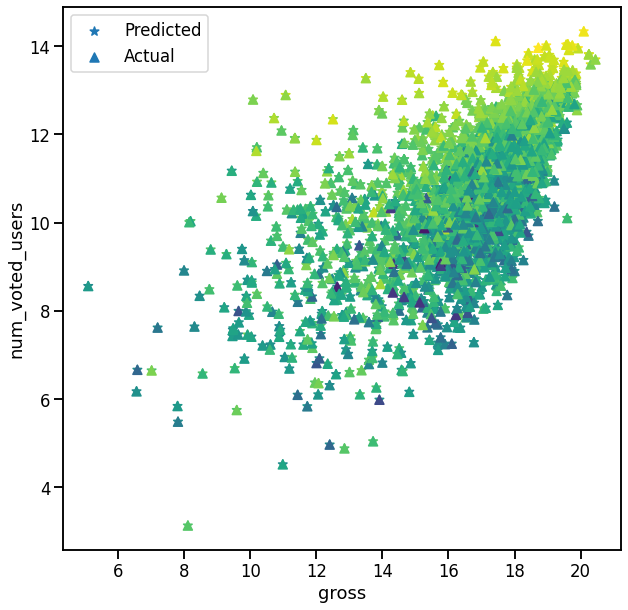

In [132]:
plt.figure(figsize=(10,10))
plt.scatter(x_train['gross'],x_train['num_voted_users'],c=dTree.predict(x_train),marker='*',label='Predicted')
plt.scatter(x_train['gross'],x_train['num_voted_users'],c=y_train,marker='^',label='Actual')
plt.xlabel(enc_data.columns[5])
plt.ylabel(enc_data.columns[6])
plt.legend()


# Random Forest Regressor

In [133]:
from sklearn.ensemble import RandomForestRegressor

In [134]:
r2_scores= []
mse =[]
estimators =[]
for i in range(1,100):
  rfc= RandomForestRegressor(n_estimators=i)
  rfc.fit(x_train,y_train)
  mse.append(mean_squared_error(y_test,rfc.predict(x_test)))
  r2_scores.append(r2_score(y_test,rfc.predict(x_test)))
  estimators.append(i)

No handles with labels found to put in legend.


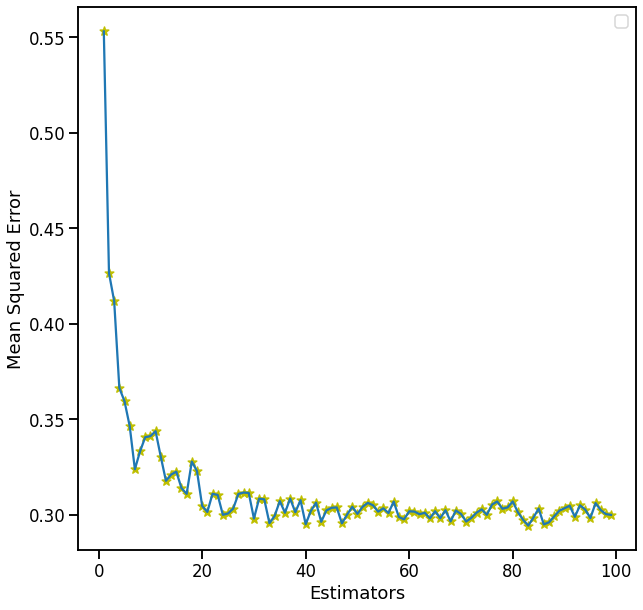

In [135]:
plt.figure(figsize=(10,10))
plt.scatter(estimators,mse,c='y',marker='*')
plt.plot(estimators,mse)
plt.xlabel('Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()

No handles with labels found to put in legend.


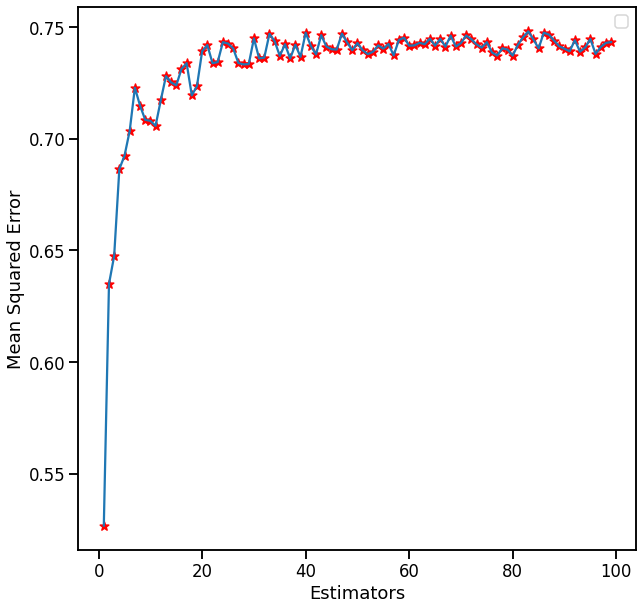

In [136]:
plt.figure(figsize=(10,10))
plt.scatter(estimators,r2_scores,c='r',marker='*')
plt.plot(estimators,r2_scores)
plt.xlabel('Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()

In [137]:
rfc= RandomForestRegressor(n_estimators=6)

In [138]:
rfc.fit(x_train,y_train)
r2_score(y_test,rfc.predict(x_test))

0.6882513919624025

Text(0, 0.5, 'Predicted')

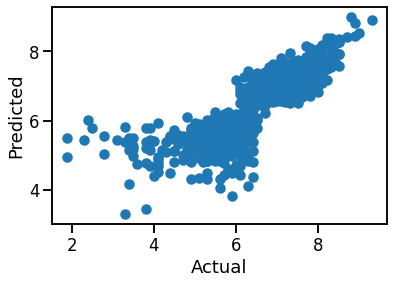

In [139]:
plt.scatter(y_test,rfc.predict(x_test))
plt.xlabel('Actual')
plt.ylabel('Predicted')

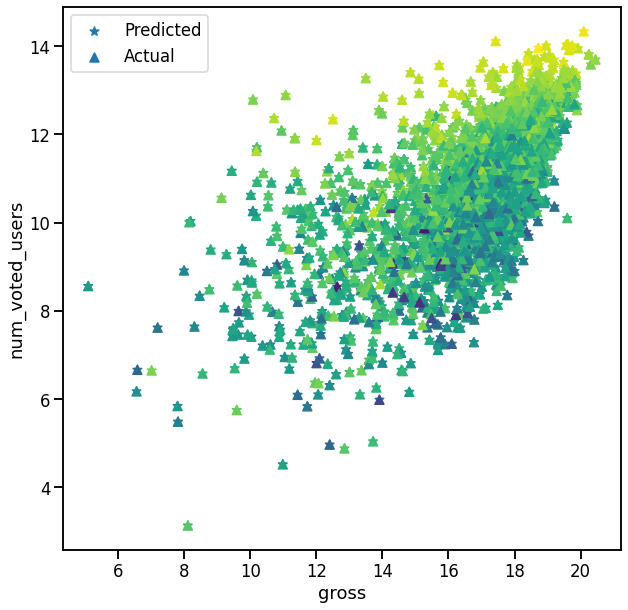

In [140]:
plt.figure(figsize=(10,10))
plt.scatter(x_train['gross'],x_train['num_voted_users'],c=rfc.predict(x_train),marker='*',label='Predicted')
plt.scatter(x_train['gross'],x_train['num_voted_users'],c=y_train,marker='^',label='Actual')
plt.xlabel(enc_data.columns[5])
plt.ylabel(enc_data.columns[6])
plt.legend()


This is the end best model was Linear Regression with Ridge Penalty but even good model can be built using Stacking which can be explored in future  